ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.2.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.2.0


Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


'Tamanho do treino: '

TensorShape([2569, 442, 1024, 3])

'Tamanho do treino: '

TensorShape([1101, 442, 1024, 3])

'Labels do treino: '

<tf.Tensor: shape=(2569,), dtype=int64, numpy=array([2, 3, 3, ..., 0, 2, 0])>

'Novas dimensões do treino: '

TensorShape([2569, 150, 150, 3])

'Nova representação dos labels: '

<tf.Tensor: shape=(2569, 5), dtype=float32, numpy=
array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - accuracy: 0.2493 - loss: 1.5975 - val_accuracy: 0.3171 - val_loss: 1.5179
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.3196 - loss: 1.4976 - val_accuracy: 0.4047 - val_loss: 1.3969
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4170 - loss: 1.3490 - val_accuracy: 0.4397 - val_loss: 1.3203
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4734 - loss: 1.2439 - val_accuracy: 0.4864 - val_loss: 1.2142
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4736 - loss: 1.2188 - val_accuracy: 0.4825 - val_loss: 1.1886
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5134 - loss: 1.1617 - val_accuracy: 0.5039 - val_loss: 1.1952
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5112 - loss: 1.1592 - val_accuracy: 0.5117 - val_loss: 1.1850
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5533 - loss: 1.0937 - val_accuracy: 0.5097 - 

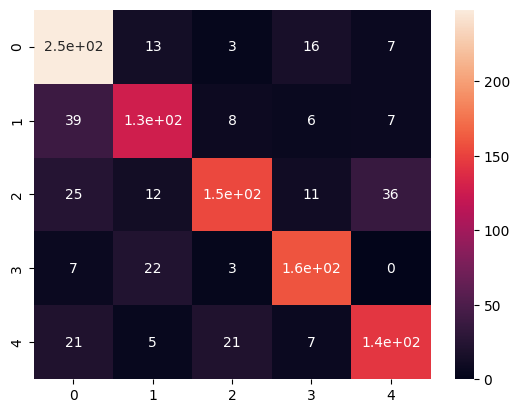

In [ ]:
import tensorflow as tf
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
# from tensorflow.keras.api._v2.keras import callbacks
from tensorflow.keras import Sequential, layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds
from tensorflow.keras.utils import to_categorical

(train_ds, train_labels), (test_ds, test_labels) = tfds.load(
  "tf_flowers",
  split=["train[:70%]", "train[:30%]"],
  batch_size=-1,
  as_supervised=True
)

display("Tamanho do treino: ")
display(train_ds.shape)
display("Tamanho do treino: ")
display(test_ds.shape)
display("Labels do treino: ")
display(train_labels)

# Tamanho alvo: 150x150 pixels
size = (150, 150)

# Redimensionando os conjuntos de treino e teste
train_ds = tf.image.resize(train_ds, size)
test_ds = tf.image.resize(test_ds, size)

# Aplicando a representação categórica dos labels
train_labels = to_categorical(train_labels, num_classes=5)
test_labels = to_categorical(test_labels, num_classes=5)

# Verificando o tamanho das variáveis
display("Novas dimensões do treino: ")
display(train_ds.shape)
display("Nova representação dos labels: ")
display(train_labels)

# Definir a arquitetura da CNN -> camada de extração de features
hand_model = Sequential()
hand_model.add( Rescaling(1./255, input_shape=(150, 150, 3)) )
hand_model.add( layers.Conv2D(16, kernel_size=10, activation="relu") )
hand_model.add( layers.MaxPooling2D(3) )
hand_model.add( layers.Conv2D(32, kernel_size=8, activation="relu") )
hand_model.add( layers.MaxPooling2D(2) )
hand_model.add( layers.Conv2D(32, kernel_size=6, activation="relu") )
hand_model.add( layers.MaxPooling2D(2) )
# Definir a arquitetura da CNN -> camada de decisão (classificação)
hand_model.add( layers.Flatten() )                     # entrada
hand_model.add( layers.Dense(50, activation="relu") )  # 1ª camada oculta
hand_model.add( layers.Dense(20, activation="relu") )  # 2ª camada oculta
hand_model.add( layers.Dense(5, activation="softmax") )# camada de decisão
# Compilar o modelo
hand_model.compile(
  optimizer="adam",
  loss="categorical_crossentropy",
  metrics=["accuracy"]
)

# Definir a estratégia de Early Stopping
es = EarlyStopping(
  monitor="val_accuracy",
  patience=5,
  restore_best_weights=True
)

# Treina o modelo
with tf.device("/device:GPU:0"):
  hand_model.fit(
    train_ds, train_labels,
    epochs=50,
    validation_split=0.2,
    batch_size=32,
    callbacks=[es]
  )

loss, acc = hand_model.evaluate(test_ds, test_labels)
print(f"A loss do modelo é {loss:.2f} e a ACC é {acc:.2f}")

# Função para obter a matriz de confusão
def plot_confusion_matrix(y_test, y_pred):
  labels = list( map( np.argmax, y_test ) )
  labels_pred = list( map( np.argmax, y_pred ) )
  cf_matrix = confusion_matrix(labels, labels_pred)
  sns.heatmap(cf_matrix, annot=True)

preds = hand_model.predict(test_ds)
plot_confusion_matrix(test_labels, preds)


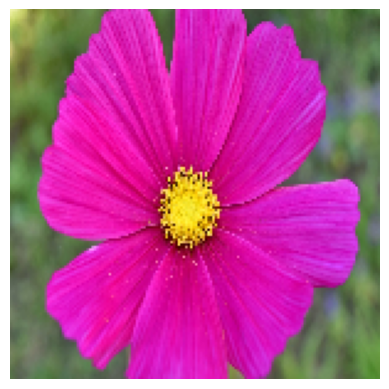

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[0.764064   0.11990593 0.05775042 0.00363629 0.05464335]]


In [ ]:
from skimage import io
from keras.preprocessing import image

def load_image(img_path, show=False):
    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]
    if show:
        plt.imshow(img_tensor[0])
        plt.axis('off')
        plt.show()
    return img_tensor


new_image = load_image('/content/flor.jpg', True)
classes = hand_model.predict(new_image)
print(classes)

# ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
# img_array = tf.keras.utils.img_to_array(img)
# img_array = tf.expand_dims(img_array, 0) # Create a batch
# hand_model.predict(img_array)